In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/data.yaml
/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/valid/labels/styro_000203.txt
/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/valid/labels/recycle_001390.txt
/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/valid/labels/recycle_000129.txt
/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/valid/labels/organic_000146.txt
/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/valid/labels/recycle_001308.txt
/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/valid/labels/recycle_001414.txt
/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/valid/labels/recycle_000842.txt
/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/valid/labels/styro_000217.txt
/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/valid/labels/styro_000052.txt
/kaggle/

## 📦 1. Installation & Setup

In [2]:
# ============================================================
# 📦 INSTALLATION - Kaggle Compatible (DO NOT MODIFY!)
# ============================================================
# IMPORTANT: Kaggle has specific package versions pre-installed.
# Installing ultralytics may upgrade numpy to 2.x causing conflicts.
# We must downgrade numpy back to 1.x after installing ultralytics.

!pip install ultralytics --quiet
!pip install "numpy<2" --quiet

print("✅ Ultralytics installed successfully!")
print("✅ NumPy downgraded to 1.x for compatibility!")
print("ℹ️  Using Kaggle pre-installed packages (torch, cv2, etc.)")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [3]:
# Import libraries
import os
import glob
import random
import shutil
import warnings
import time
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2

import torch
from ultralytics import YOLO

# Suppress warnings
warnings.filterwarnings('ignore')

# Set style (with fallback for different matplotlib versions)
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('ggplot')
sns.set_palette("husl")

# Check GPU
print(f"🔥 PyTorch Version: {torch.__version__}")
print(f"🎮 CUDA Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"🖥️ GPU: {torch.cuda.get_device_name(0)}")
    print(f"💾 GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
🔥 PyTorch Version: 2.6.0+cu124
🎮 CUDA Available: True
🖥️ GPU: Tesla P100-PCIE-16GB
💾 GPU Memory: 17.06 GB


## 📂 2. Dataset Configuration

In [4]:
# Dataset paths - Update based on Kaggle input
DATASET_PATH = "/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset"

# Check dataset structure
print("📁 Dataset Structure:")
for root, dirs, files in os.walk(DATASET_PATH):
    level = root.replace(DATASET_PATH, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    if level < 2:
        subindent = ' ' * 2 * (level + 1)
        for file in files[:5]:
            print(f"{subindent}{file}")
        if len(files) > 5:
            print(f"{subindent}... and {len(files)-5} more files")

📁 Dataset Structure:
Final_dataset/
  data.yaml
  valid/
    labels/
    images/
  test/
    labels/
    images/
  train/
    labels/
    images/


In [5]:
# Class definitions - 40 classes total (0-39)
CLASS_NAMES = {
    # Organic (0-32) - 33 classes
    0: 'Apple', 1: 'Apple-core', 2: 'Apple-peel', 3: 'Bone', 4: 'Bone-fish',
    5: 'Bread', 6: 'Bun', 7: 'Egg', 8: 'Egg-hard', 9: 'Egg-scramble',
    10: 'Egg-shell', 11: 'Egg-steam', 12: 'Egg-yolk', 13: 'Fish', 14: 'Meat',
    15: 'Mussel', 16: 'Mussel-shell', 17: 'Noodle', 18: 'Orange', 19: 'Orange-peel',
    20: 'Other-waste', 21: 'Pancake', 22: 'Pasta', 23: 'Pear', 24: 'Pear-core',
    25: 'Pear-peel', 26: 'Potato', 27: 'Rice', 28: 'Shrimp', 29: 'Shrimp-shell',
    30: 'Tofu', 31: 'Tomato', 32: 'Vegetable',
    # Inorganic (33-34)
    33: 'plastic_bag', 34: 'styrofoam',
    # Recyclable (35-39)
    35: 'Cardboard', 36: 'Glass', 37: 'Metal', 38: 'Paper', 39: 'Plastic'
}

# Category mapping - 40 classes total
CATEGORIES = {
    'Organic': list(range(0, 33)),      # 33 classes
    'Inorganic': [33, 34],               # 2 classes
    'Recyclable': [35, 36, 37, 38, 39]   # 5 classes
}

CATEGORY_COLORS = {
    'Organic': '#FF6600',
    'Inorganic': '#00FF00', 
    'Recyclable': '#3B82F6'
}

print(f"📊 Total Classes: {len(CLASS_NAMES)}")
for cat, ids in CATEGORIES.items():
    print(f"   {cat}: {len(ids)} classes")

📊 Total Classes: 40
   Organic: 33 classes
   Inorganic: 2 classes
   Recyclable: 5 classes


In [6]:
# Create data.yaml for training
yaml_content = f"""# Waste Classification Dataset
# 40 classes - 3 categories (Organic: 33, Inorganic: 2, Recyclable: 5)

path: {DATASET_PATH}
train: train/images
val: valid/images
test: test/images

nc: 40
names:
"""

for idx, name in CLASS_NAMES.items():
    yaml_content += f"  {idx}: {name}\n"

# Save yaml file
yaml_path = "/kaggle/working/data.yaml"
with open(yaml_path, 'w') as f:
    f.write(yaml_content)

print(f"✅ Created {yaml_path}")
print("\n" + yaml_content[:500] + "...")

✅ Created /kaggle/working/data.yaml

# Waste Classification Dataset
# 40 classes - 3 categories (Organic: 33, Inorganic: 2, Recyclable: 5)

path: /kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset
train: train/images
val: valid/images
test: test/images

nc: 40
names:
  0: Apple
  1: Apple-core
  2: Apple-peel
  3: Bone
  4: Bone-fish
  5: Bread
  6: Bun
  7: Egg
  8: Egg-hard
  9: Egg-scramble
  10: Egg-shell
  11: Egg-steam
  12: Egg-yolk
  13: Fish
  14: Meat
  15: Mussel
  16: Mussel-shell
  17: Noodle
  18: O...


## 1. Training Results Visualization

In [7]:
# Load training results
def load_results(csv_path):
    df = pd.read_csv(csv_path)
    df.columns = df.columns.str.strip()
    return df

results_paths = {
    'YOLOv8n': '/kaggle/input/model-yolov8n-yolo11n-waste/other/default/1/runs/yolov8n_waste/results.csv',
    'YOLO11n': '/kaggle/input/model-yolov8n-yolo11n-waste/other/default/1/runs/yolo11n_waste_optimized/results.csv'
}

all_results = {}
for name, path in results_paths.items():
    if os.path.exists(path):
        all_results[name] = load_results(path)
        print(f"✅ Loaded {name} results: {len(all_results[name])} epochs")
    else:
        print(f"❌ {name} results not found")

✅ Loaded YOLOv8n results: 100 epochs
✅ Loaded YOLO11n results: 100 epochs


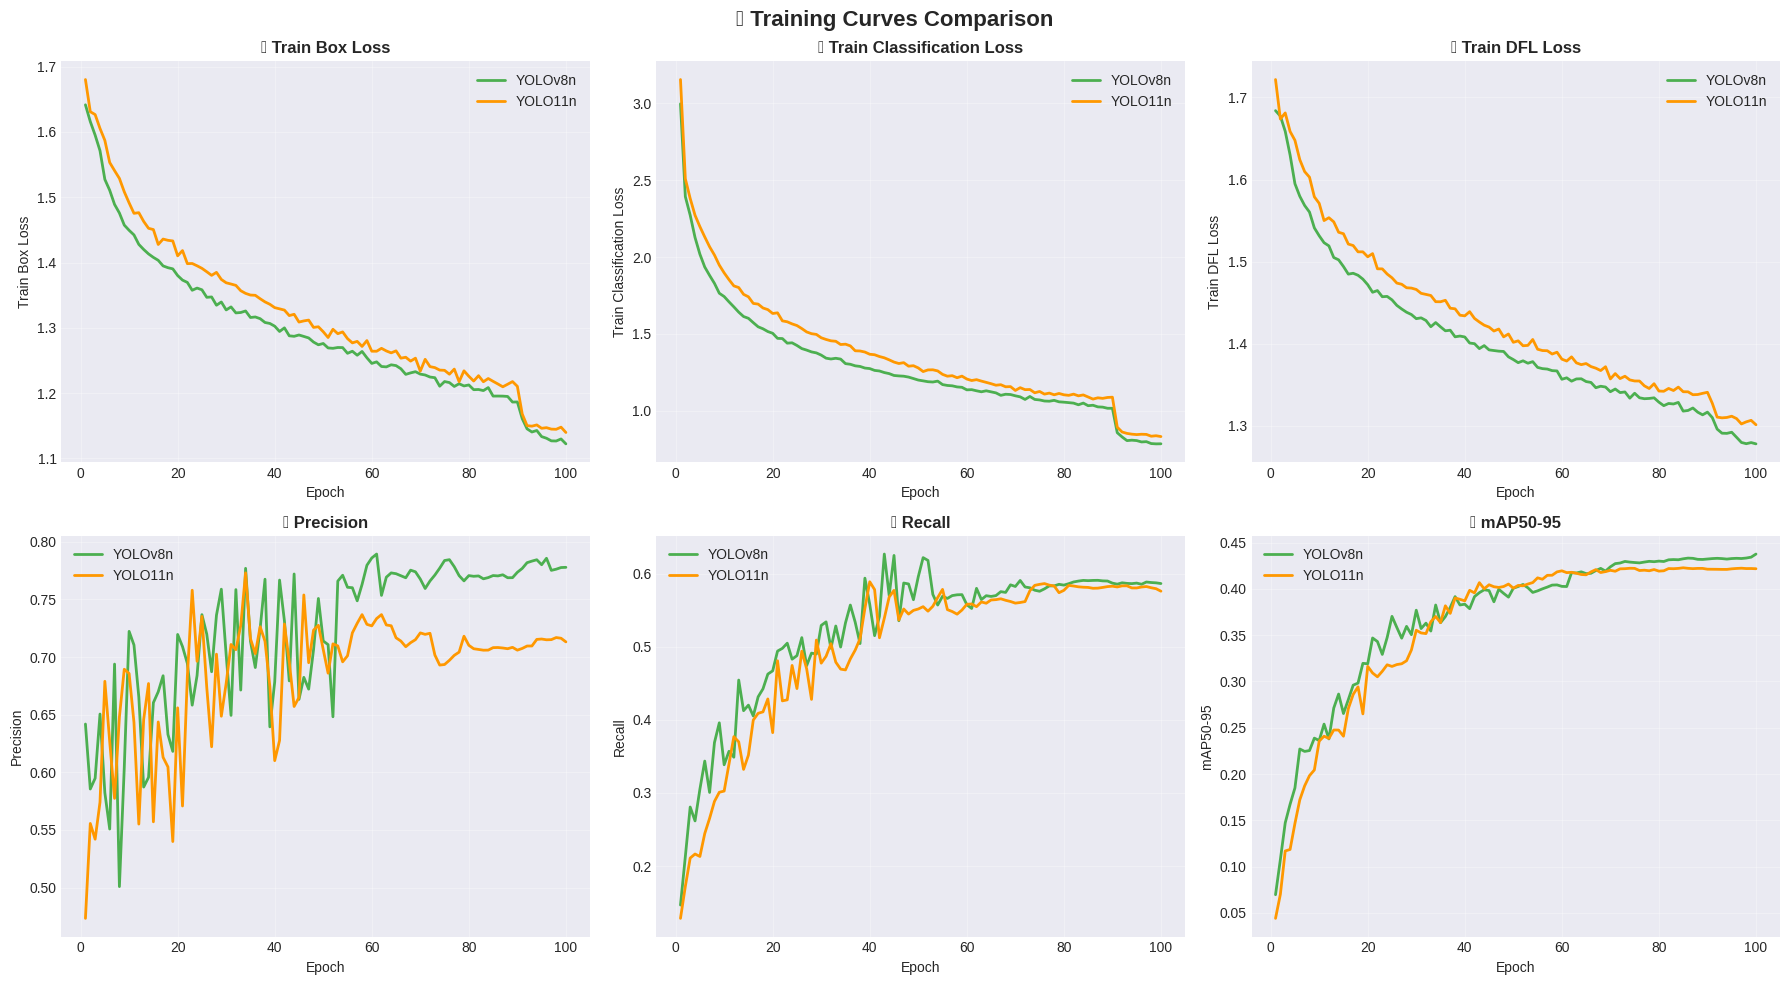

In [8]:
# Plot training curves comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

metrics = [
    ('train/box_loss', 'Train Box Loss'),
    ('train/cls_loss', 'Train Classification Loss'),
    ('train/dfl_loss', 'Train DFL Loss'),
    ('metrics/precision(B)', 'Precision'),
    ('metrics/recall(B)', 'Recall'),
    ('metrics/mAP50-95(B)', 'mAP50-95')
]

colors = {'YOLOv8n': '#4CAF50', 'YOLOv8s': '#2196F3', 'YOLO11n': '#FF9800'}

for idx, (metric, title) in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    
    for model_name, df in all_results.items():
        if metric in df.columns:
            ax.plot(df['epoch'], df[metric], label=model_name, color=colors[model_name], linewidth=2)
    
    ax.set_xlabel('Epoch')
    ax.set_ylabel(title)
    ax.set_title(f'📈 {title}', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('🔥 Training Curves Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('/kaggle/working/training_curves.png', dpi=150)
plt.show()

## 🧪 2. Model Evaluation & Comparison

In [9]:
# Load best models
model_paths = {
    'YOLOv8n': '/kaggle/input/model-yolov8n-yolo11n-waste/other/default/1/runs/yolov8n_waste/weights/best.pt',
    'YOLO11n': '/kaggle/input/model-yolov8n-yolo11n-waste/other/default/1/runs/yolo11n_waste_optimized/weights/best.pt'
}

best_models = {}
for name, path in model_paths.items():
    if os.path.exists(path):
        best_models[name] = YOLO(path)
        print(f"✅ Loaded {name} best model")
    else:
        print(f"❌ {name} model not found")

✅ Loaded YOLOv8n best model
✅ Loaded YOLO11n best model


In [10]:
# Evaluate all models on test set
evaluation_results = {}

for name, model in best_models.items():
    print(f"\n{'='*60}")
    print(f"📊 Evaluating {name} on Test Set")
    print(f"{'='*60}")
    
    metrics = model.val(
        data='/kaggle/working/data.yaml',
        split='test',
        verbose=True
    )
    
    evaluation_results[name] = {
        'mAP50': metrics.box.map50,
        'mAP50-95': metrics.box.map,
        'Precision': metrics.box.mp,
        'Recall': metrics.box.mr,
        'F1': 2 * (metrics.box.mp * metrics.box.mr) / (metrics.box.mp + metrics.box.mr + 1e-6)
    }
    
    print(f"\n📈 {name} Results:")
    for metric, value in evaluation_results[name].items():
        print(f"   {metric}: {value:.4f}")


📊 Evaluating YOLOv8n on Test Set
Ultralytics 8.3.234 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,013,448 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 7.8±2.9 MB/s, size: 24.5 KB)
val: Scanning /kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/test/labels... 1018 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1018/1018 379.3it/s 2.7s
WARNING ⚠️ val: Cache directory /kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/test is not writable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 452, len(boxes) = 1253. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 64/64 8.2

In [11]:
# Speed benchmark
speed_results = {}
test_images = glob.glob(f"{DATASET_PATH}/test/images/*.jpg")[:100]

if not test_images:
    test_images = glob.glob(f"{DATASET_PATH}/test/images/*.png")[:100]

if test_images:
    for name, model in best_models.items():
        print(f"\n⏱️ Benchmarking {name}...")
        
        # Warmup
        for _ in range(5):
            _ = model.predict(test_images[0], verbose=False)
        
        # Benchmark
        start = time.time()
        for img in test_images:
            _ = model.predict(img, verbose=False)
        end = time.time()
        
        avg_time = (end - start) / len(test_images) * 1000  # ms
        fps = 1000 / avg_time
        
        speed_results[name] = {
            'Inference Time (ms)': avg_time,
            'FPS': fps
        }
        
        print(f"   Avg Time: {avg_time:.2f}ms | FPS: {fps:.1f}")
else:
    print("⚠️ No test images found for benchmarking")
    for name in best_models.keys():
        speed_results[name] = {'Inference Time (ms)': 0, 'FPS': 1}


⏱️ Benchmarking YOLOv8n...
   Avg Time: 10.77ms | FPS: 92.9

⏱️ Benchmarking YOLO11n...
   Avg Time: 12.87ms | FPS: 77.7



📊 Detailed Analysis for YOLOv8n
Ultralytics 8.3.234 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 45.5±30.6 MB/s, size: 23.4 KB)
val: Scanning /kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/test/labels... 1018 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1018/1018 974.6it/s 1.0s
WARNING ⚠️ val: Cache directory /kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/test is not writable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 452, len(boxes) = 1253. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 64/64 8.6it/s 7.4s
                   all       1018       1253      0.901      0.836   

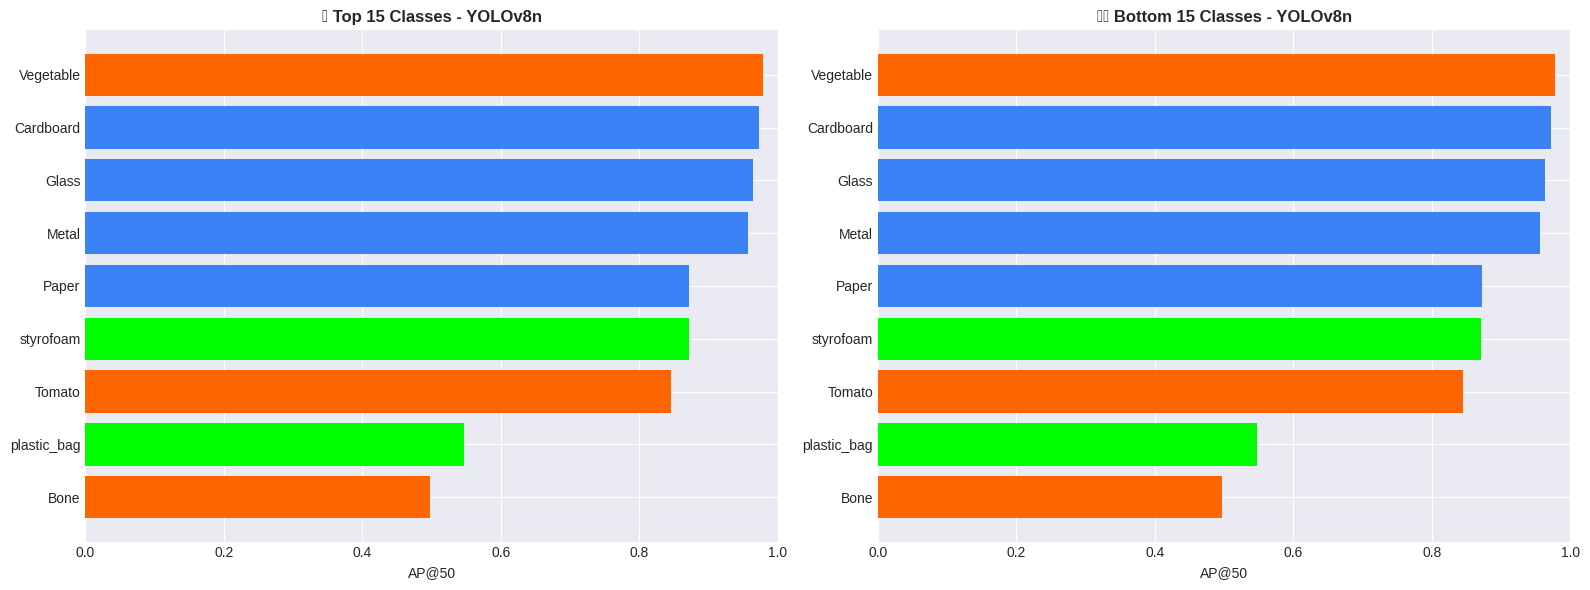


📊 Category-level Performance:
              mean     std     min     max
Category                                  
Inorganic   0.7090  0.2293  0.5468  0.8712
Organic     0.7736  0.2483  0.4975  0.9784
Recyclable  0.9411  0.0464  0.8723  0.9725

📊 Detailed Analysis for YOLO11n
Ultralytics 8.3.234 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 22.7±3.8 MB/s, size: 14.7 KB)
val: Scanning /kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/test/labels... 1018 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1018/1018 1.1Kit/s 0.9s
WARNING ⚠️ val: Cache directory /kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/test is not writable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 452, len(boxes) = 1253. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segme

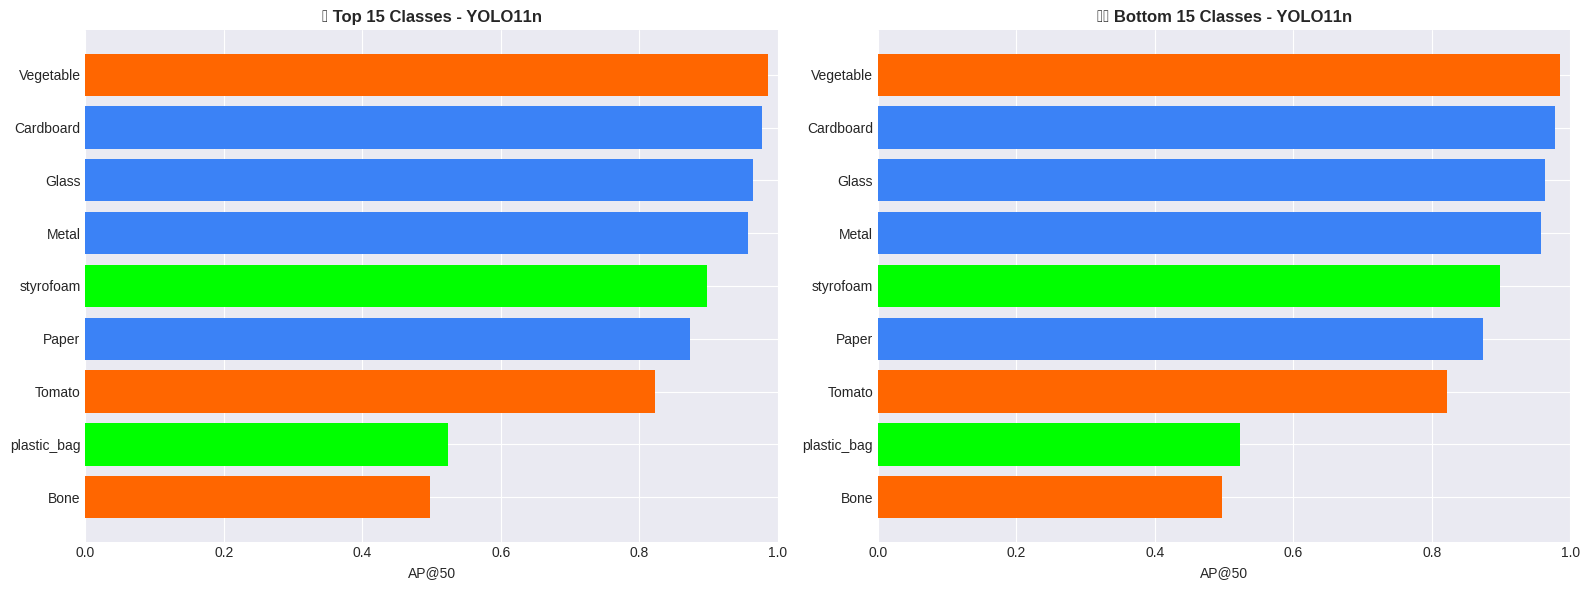


📊 Category-level Performance:
              mean     std     min     max
Category                                  
Inorganic   0.7104  0.2651  0.5229  0.8978
Organic     0.7682  0.2482  0.4975  0.9851
Recyclable  0.9429  0.0472  0.8733  0.9775


In [12]:
# ============================================================
# 📊 CONFUSION MATRIX & PER-CLASS ANALYSIS
# ============================================================

def plot_confusion_matrix_analysis(model, model_name, data_yaml):
    """Generate detailed confusion matrix and per-class metrics"""
    
    print(f"\n{'='*60}")
    print(f"📊 Detailed Analysis for {model_name}")
    print(f"{'='*60}")
    
    # Run validation to get confusion matrix
    metrics = model.val(data=data_yaml, split='test', plots=True, verbose=False)
    
    # Get per-class metrics
    if hasattr(metrics.box, 'ap_class_index') and hasattr(metrics.box, 'ap'):
        class_indices = metrics.box.ap_class_index
        class_aps = metrics.box.ap50  # AP at IoU=0.5
        
        # Create per-class DataFrame
        per_class_data = []
        for idx, ap in zip(class_indices, class_aps):
            class_name = CLASS_NAMES.get(int(idx), f'Class_{idx}')
            category = 'Unknown'
            for cat, ids in CATEGORIES.items():
                if int(idx) in ids:
                    category = cat
                    break
            per_class_data.append({
                'Class ID': int(idx),
                'Class Name': class_name,
                'Category': category,
                'AP@50': ap
            })
        
        per_class_df = pd.DataFrame(per_class_data)
        per_class_df = per_class_df.sort_values('AP@50', ascending=False)
        
        print(f"\n🔝 Top 10 Best Performing Classes:")
        print(per_class_df.head(10).to_string(index=False))
        
        print(f"\n⚠️ Bottom 10 Classes (Need Improvement):")
        print(per_class_df.tail(10).to_string(index=False))
        
        # Visualize per-class AP
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Top 15 classes
        top_15 = per_class_df.head(15)
        colors = [CATEGORY_COLORS.get(cat, '#888') for cat in top_15['Category']]
        axes[0].barh(top_15['Class Name'], top_15['AP@50'], color=colors)
        axes[0].set_xlabel('AP@50')
        axes[0].set_title(f'🏆 Top 15 Classes - {model_name}', fontweight='bold')
        axes[0].invert_yaxis()
        axes[0].set_xlim(0, 1)
        
        # Bottom 15 classes
        bottom_15 = per_class_df.tail(15)
        colors = [CATEGORY_COLORS.get(cat, '#888') for cat in bottom_15['Category']]
        axes[1].barh(bottom_15['Class Name'], bottom_15['AP@50'], color=colors)
        axes[1].set_xlabel('AP@50')
        axes[1].set_title(f'⚠️ Bottom 15 Classes - {model_name}', fontweight='bold')
        axes[1].invert_yaxis()
        axes[1].set_xlim(0, 1)
        
        plt.tight_layout()
        plt.savefig(f'/kaggle/working/per_class_analysis_{model_name.lower().replace(" ", "_")}.png', dpi=150)
        plt.show()
        
        # Category-level summary
        print(f"\n📊 Category-level Performance:")
        category_summary = per_class_df.groupby('Category')['AP@50'].agg(['mean', 'std', 'min', 'max'])
        print(category_summary.round(4).to_string())
        
        return per_class_df
    
    return None

# Analyze best model
best_model_name = list(best_models.keys())[0]  # Will be updated after comparison
per_class_results = {}

for name, model in best_models.items():
    per_class_results[name] = plot_confusion_matrix_analysis(
        model, name, '/kaggle/working/data.yaml'
    )

In [13]:
# Create comparison table
comparison_df = pd.DataFrame()

for name in best_models.keys():
    row = {
        'Model': name,
        **evaluation_results.get(name, {}),
        **speed_results.get(name, {})
    }
    comparison_df = pd.concat([comparison_df, pd.DataFrame([row])], ignore_index=True)

# Calculate overall score (weighted)
comparison_df['Overall Score'] = (
    comparison_df['mAP50-95'] * 0.4 +
    comparison_df['F1'] * 0.3 +
    (comparison_df['FPS'] / comparison_df['FPS'].max()) * 0.3
)

comparison_df = comparison_df.sort_values('Overall Score', ascending=False)

print("\n" + "="*80)
print("🏆 MODEL COMPARISON RESULTS")
print("="*80)
print(comparison_df.to_string(index=False))

# Save comparison
comparison_df.to_csv('/kaggle/working/model_comparison.csv', index=False)


🏆 MODEL COMPARISON RESULTS
  Model    mAP50  mAP50-95  Precision   Recall       F1  Inference Time (ms)       FPS  Overall Score
YOLOv8n 0.833709  0.624389   0.900765 0.836366 0.867371            10.767891 92.868693       0.809967
YOLO11n 0.832968  0.611034   0.887183 0.839548 0.862708            12.870545 77.696785       0.754215


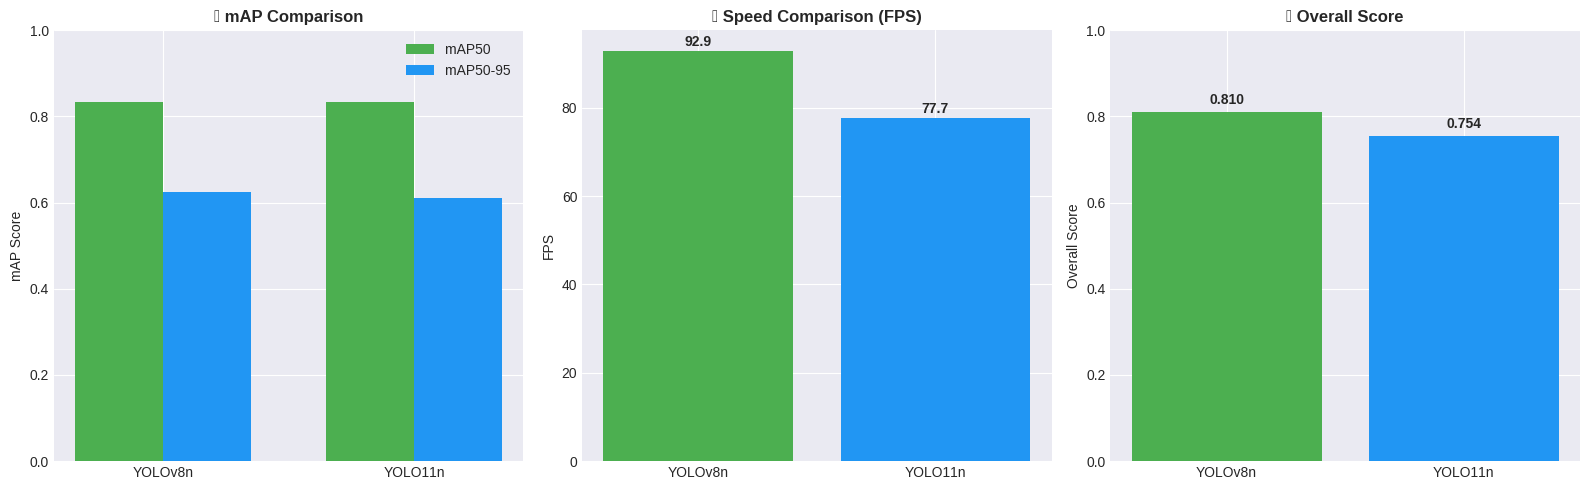

In [14]:
# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# mAP comparison
x = np.arange(len(comparison_df))
width = 0.35

axes[0].bar(x - width/2, comparison_df['mAP50'], width, label='mAP50', color='#4CAF50')
axes[0].bar(x + width/2, comparison_df['mAP50-95'], width, label='mAP50-95', color='#2196F3')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_df['Model'])
axes[0].set_ylabel('mAP Score')
axes[0].set_title('📊 mAP Comparison', fontweight='bold')
axes[0].legend()
axes[0].set_ylim(0, 1)

# Speed comparison
colors = ['#4CAF50', '#2196F3', '#FF9800']
bars = axes[1].bar(comparison_df['Model'], comparison_df['FPS'], color=colors[:len(comparison_df)])
axes[1].set_ylabel('FPS')
axes[1].set_title('⚡ Speed Comparison (FPS)', fontweight='bold')
for bar, fps in zip(bars, comparison_df['FPS']):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{fps:.1f}', ha='center', fontweight='bold')

# Overall score
bars = axes[2].bar(comparison_df['Model'], comparison_df['Overall Score'], color=colors[:len(comparison_df)])
axes[2].set_ylabel('Overall Score')
axes[2].set_title('🏆 Overall Score', fontweight='bold')
axes[2].set_ylim(0, 1)
for bar, score in zip(bars, comparison_df['Overall Score']):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                 f'{score:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('/kaggle/working/model_comparison.png', dpi=150)
plt.show()

In [15]:
# Select best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = best_models[best_model_name]
best_model_path = model_paths[best_model_name]

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Path: {best_model_path}")
print(f"   mAP50: {comparison_df.iloc[0]['mAP50']:.4f}")
print(f"   mAP50-95: {comparison_df.iloc[0]['mAP50-95']:.4f}")
print(f"   F1 Score: {comparison_df.iloc[0]['F1']:.4f}")
print(f"   FPS: {comparison_df.iloc[0]['FPS']:.1f}")


🏆 BEST MODEL: YOLOv8n
   Path: /kaggle/input/model-yolov8n-yolo11n-waste/other/default/1/runs/yolov8n_waste/weights/best.pt
   mAP50: 0.8337
   mAP50-95: 0.6244
   F1 Score: 0.8674
   FPS: 92.9


## 🎯 3. Inference Demo

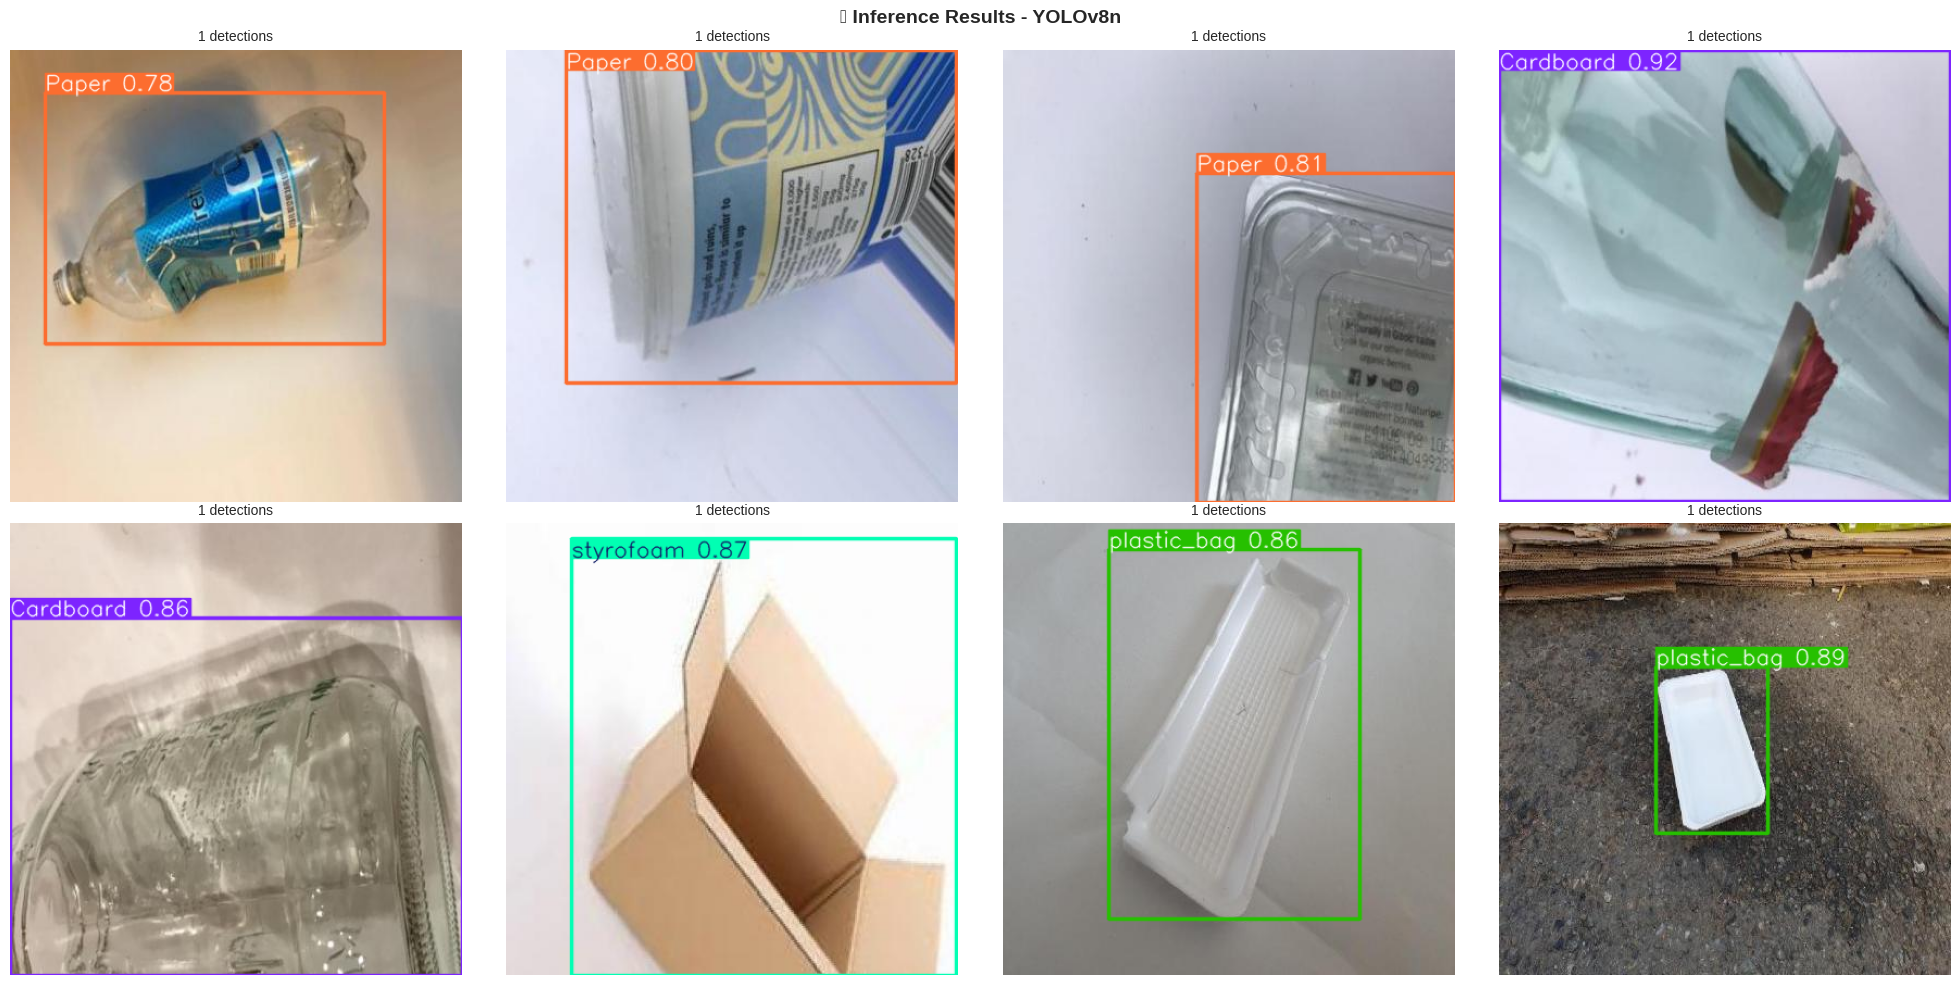

In [16]:
# Test inference on sample images
test_samples = glob.glob(f"{DATASET_PATH}/test/images/*.jpg")[:8]

# Handle case where fewer than 8 images exist
if len(test_samples) < 8:
    test_samples_png = glob.glob(f"{DATASET_PATH}/test/images/*.png")[:8 - len(test_samples)]
    test_samples.extend(test_samples_png)

if test_samples:
    n_samples = min(len(test_samples), 8)
    n_cols = min(4, n_samples)
    n_rows = (n_samples + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    
    # Convert axes to list for consistent indexing
    if n_samples == 1:
        axes = [axes]
    elif n_rows > 1:
        axes = axes.flatten()
    
    for idx, img_path in enumerate(test_samples[:n_samples]):
        # Run inference
        results = best_model.predict(img_path, conf=0.25, verbose=False)
        
        # Get annotated image
        annotated_img = results[0].plot()
        annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
        
        axes[idx].imshow(annotated_img)
        axes[idx].axis('off')
        
        # Count detections
        n_detections = len(results[0].boxes)
        axes[idx].set_title(f'{n_detections} detections', fontsize=10)
    
    # Hide unused axes
    for idx in range(n_samples, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle(f'🎯 Inference Results - {best_model_name}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('/kaggle/working/inference_demo.png', dpi=150)
    plt.show()
else:
    print("⚠️ No test images found for inference demo")


🔍 ERROR ANALYSIS - Identifying Difficult Cases

📊 Detection Confidence Distribution (200 samples):
   🟢 High Confidence (>80%): 126 images
   🟡 Medium Confidence (50-80%): 54 images
   🔴 Low Confidence (25-50%): 15 images
   ⚫ No Detection: 5 images
   🔀 Multi-Category: 5 images

⚠️ Showing Low Confidence Detection Examples:


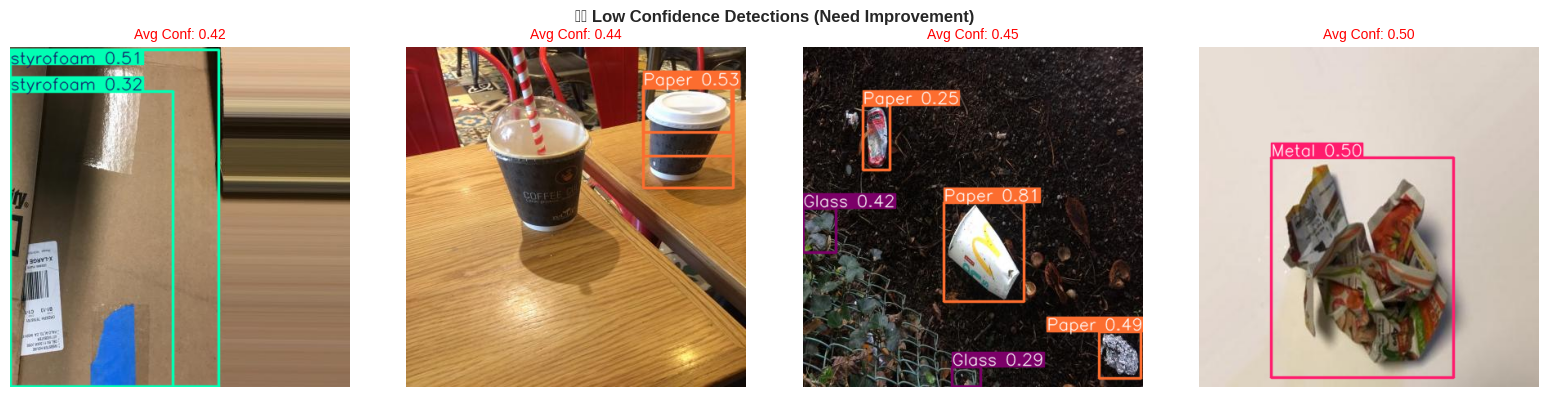

In [17]:
# ============================================================
# 🔍 ERROR ANALYSIS - Find Difficult Cases
# ============================================================

print("\n" + "="*60)
print("🔍 ERROR ANALYSIS - Identifying Difficult Cases")
print("="*60)

def analyze_detection_errors(model, test_images, labels_path, conf_threshold=0.25):
    """Analyze false positives, false negatives, and low confidence detections"""
    
    results_analysis = {
        'high_confidence': [],  # > 0.8
        'medium_confidence': [],  # 0.5 - 0.8
        'low_confidence': [],  # 0.25 - 0.5
        'no_detection': [],  # Images with no detections
        'multi_category': []  # Images with multiple categories
    }
    
    for img_path in test_images[:200]:  # Analyze 200 images
        results = model.predict(img_path, conf=conf_threshold, verbose=False)
        
        if len(results[0].boxes) == 0:
            results_analysis['no_detection'].append(img_path)
        else:
            confs = results[0].boxes.conf.cpu().numpy()
            classes = results[0].boxes.cls.cpu().numpy()
            
            # Categorize by confidence
            avg_conf = np.mean(confs)
            if avg_conf > 0.8:
                results_analysis['high_confidence'].append((img_path, avg_conf))
            elif avg_conf > 0.5:
                results_analysis['medium_confidence'].append((img_path, avg_conf))
            else:
                results_analysis['low_confidence'].append((img_path, avg_conf))
            
            # Check for multi-category
            categories_found = set()
            for cls in classes:
                for cat, ids in CATEGORIES.items():
                    if int(cls) in ids:
                        categories_found.add(cat)
            if len(categories_found) > 1:
                results_analysis['multi_category'].append((img_path, list(categories_found)))
    
    return results_analysis

test_images = glob.glob(f"{DATASET_PATH}/test/images/*.jpg")
if not test_images:
    test_images = glob.glob(f"{DATASET_PATH}/test/images/*.png")

if test_images:
    error_analysis = analyze_detection_errors(best_model, test_images, f"{DATASET_PATH}/test/labels")

    print(f"\n📊 Detection Confidence Distribution (200 samples):")
    print(f"   🟢 High Confidence (>80%): {len(error_analysis['high_confidence'])} images")
    print(f"   🟡 Medium Confidence (50-80%): {len(error_analysis['medium_confidence'])} images")
    print(f"   🔴 Low Confidence (25-50%): {len(error_analysis['low_confidence'])} images")
    print(f"   ⚫ No Detection: {len(error_analysis['no_detection'])} images")
    print(f"   🔀 Multi-Category: {len(error_analysis['multi_category'])} images")

    # Visualize difficult cases
    if error_analysis['low_confidence']:
        print("\n⚠️ Showing Low Confidence Detection Examples:")
        n_low_conf = min(4, len(error_analysis['low_confidence']))
        fig, axes = plt.subplots(1, n_low_conf, figsize=(4 * n_low_conf, 4))
        
        if n_low_conf == 1:
            axes = [axes]
        
        for idx, (img_path, conf) in enumerate(error_analysis['low_confidence'][:n_low_conf]):
            results = best_model.predict(img_path, conf=0.25, verbose=False)
            annotated_img = results[0].plot()
            annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
            
            axes[idx].imshow(annotated_img)
            axes[idx].axis('off')
            axes[idx].set_title(f'Avg Conf: {conf:.2f}', fontsize=10, color='red')
        
        plt.suptitle('⚠️ Low Confidence Detections (Need Improvement)', fontsize=12, fontweight='bold')
        plt.tight_layout()
        plt.savefig('/kaggle/working/low_confidence_cases.png', dpi=150)
        plt.show()
    else:
        print("\n✅ No low confidence detections found - Model performs well!")
else:
    print("⚠️ No test images found for error analysis")


🎬 VIDEO/STREAMING INFERENCE SIMULATION

🎥 Simulating video stream at 30 FPS target...

📊 Streaming Performance Results:
   • Frames Processed: 60
   • Average Inference Time: 10.43ms (±0.76ms)
   • Achieved FPS: 95.8
   • Target FPS: 30
   ✅ PASS - Model can handle real-time streaming!


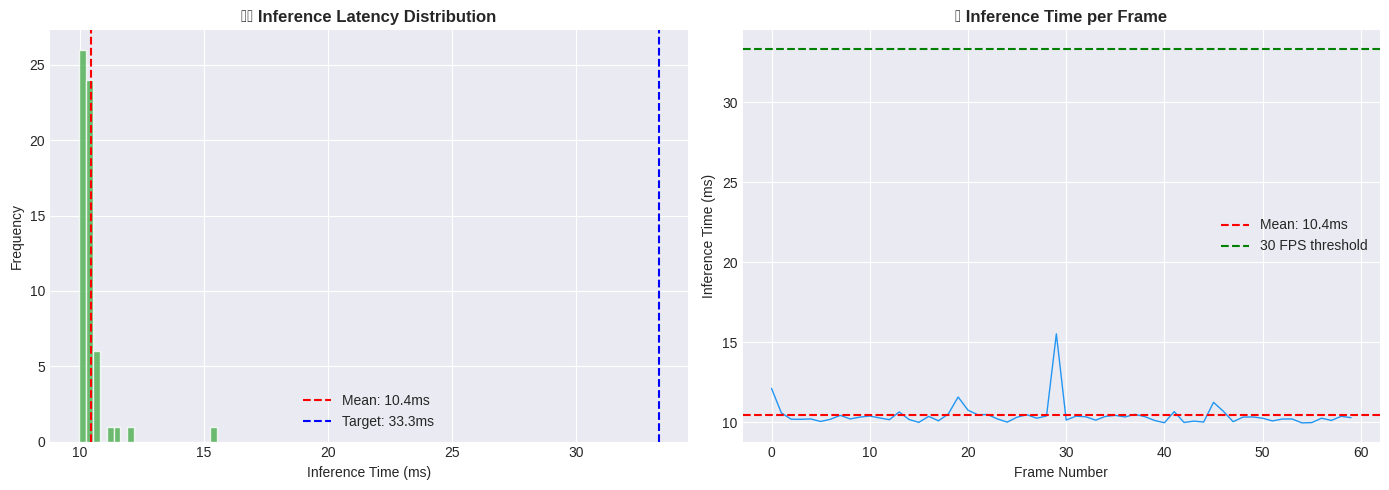

In [18]:
# ============================================================
# 🎬 VIDEO INFERENCE TEST (Simulated)
# ============================================================

print("\n" + "="*60)
print("🎬 VIDEO/STREAMING INFERENCE SIMULATION")
print("="*60)

def simulate_video_inference(model, images, fps_target=30):
    """Simulate real-time video inference to test streaming capability"""
    
    print(f"\n🎥 Simulating video stream at {fps_target} FPS target...")
    
    inference_times = []
    frame_count = 0
    
    # Process frames
    for img_path in images[:60]:  # Simulate 60 frames (2 seconds at 30fps)
        start = time.time()
        results = model.predict(img_path, conf=0.25, verbose=False)
        end = time.time()
        
        inference_times.append((end - start) * 1000)  # Convert to ms
        frame_count += 1
    
    avg_time = np.mean(inference_times)
    actual_fps = 1000 / avg_time
    std_time = np.std(inference_times)
    
    print(f"\n📊 Streaming Performance Results:")
    print(f"   • Frames Processed: {frame_count}")
    print(f"   • Average Inference Time: {avg_time:.2f}ms (±{std_time:.2f}ms)")
    print(f"   • Achieved FPS: {actual_fps:.1f}")
    print(f"   • Target FPS: {fps_target}")
    
    if actual_fps >= fps_target:
        print(f"   ✅ PASS - Model can handle real-time streaming!")
    elif actual_fps >= fps_target * 0.8:
        print(f"   🟡 ACCEPTABLE - Close to real-time ({actual_fps/fps_target*100:.1f}% of target)")
    else:
        print(f"   🔴 BELOW TARGET - Consider using lighter model for streaming")
    
    # Visualize latency distribution
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Latency histogram
    axes[0].hist(inference_times, bins=20, color='#4CAF50', edgecolor='white', alpha=0.8)
    axes[0].axvline(avg_time, color='red', linestyle='--', label=f'Mean: {avg_time:.1f}ms')
    axes[0].axvline(1000/fps_target, color='blue', linestyle='--', label=f'Target: {1000/fps_target:.1f}ms')
    axes[0].set_xlabel('Inference Time (ms)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('⏱️ Inference Latency Distribution', fontweight='bold')
    axes[0].legend()
    
    # Latency over time
    axes[1].plot(inference_times, color='#2196F3', linewidth=1)
    axes[1].axhline(avg_time, color='red', linestyle='--', label=f'Mean: {avg_time:.1f}ms')
    axes[1].axhline(1000/fps_target, color='green', linestyle='--', label=f'30 FPS threshold')
    axes[1].set_xlabel('Frame Number')
    axes[1].set_ylabel('Inference Time (ms)')
    axes[1].set_title('📈 Inference Time per Frame', fontweight='bold')
    axes[1].legend()
    
    plt.tight_layout()
    plt.savefig('/kaggle/working/streaming_performance.png', dpi=150)
    plt.show()
    
    return {
        'avg_time_ms': avg_time,
        'fps': actual_fps,
        'std_ms': std_time
    }

# Get test images for streaming simulation
streaming_test_images = glob.glob(f"{DATASET_PATH}/test/images/*.jpg")
if not streaming_test_images:
    streaming_test_images = glob.glob(f"{DATASET_PATH}/test/images/*.png")

if streaming_test_images:
    streaming_results = simulate_video_inference(best_model, streaming_test_images, fps_target=30)
else:
    print("⚠️ No test images found for streaming simulation")

## 🔧 4. Model Export for Deployment

In [19]:
# Export best model to various formats
print("📦 Exporting best model to multiple formats...\n")

export_dir = '/kaggle/working'
os.makedirs(export_dir, exist_ok=True)

# IMPORTANT: Copy model to /kaggle/working/ first (Kaggle input is read-only!)
working_model_path = '/kaggle/working/best_model.pt'
shutil.copy(best_model_path, working_model_path)
print(f"📋 Copied model to: {working_model_path}")

# Reload model from writable location
export_model = YOLO(working_model_path)

# 1. ONNX (for cross-platform deployment)
print("\n1️⃣ Exporting to ONNX...")
try:
    export_model.export(format='onnx', dynamic=True, simplify=True)
    print("   ✅ ONNX export complete")
except Exception as e:
    print(f"   ⚠️ ONNX export failed: {e}")

# 2. TorchScript (for PyTorch deployment)
print("\n2️⃣ Exporting to TorchScript...")
try:
    export_model.export(format='torchscript')
    print("   ✅ TorchScript export complete")
except Exception as e:
    print(f"   ⚠️ TorchScript export failed: {e}")

# 3. TensorRT (for NVIDIA GPU optimization) - Optional
try:
    print("\n3️⃣ Exporting to TensorRT...")
    export_model.export(format='engine', half=True)
    print("   ✅ TensorRT export complete")
except Exception as e:
    print(f"   ⚠️ TensorRT export skipped: {e}")

print("\n✅ All exports completed!")

📦 Exporting best model to multiple formats...

📋 Copied model to: /kaggle/working/best_model.pt

1️⃣ Exporting to ONNX...
Ultralytics 8.3.234 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 3,013,448 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/kaggle/working/best_model.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 44, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Using Python 3.11.13 environment at: /usr
Resolved 14 packages in 193ms
 Downloaded onnxruntime-gpu
Prepared 4 packages in 2.67s
Installed 4 packages in 11ms
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnxruntime-gpu==1.23.2
 + onnxslim==0.1.78

requirements: AutoUpdate success ✅ 3.2s
WARNING ⚠️ requirements: 

In [20]:
# List exported files
print("📁 Exported Files in /kaggle/working/:")

# Check for exported files in working directory
exported_extensions = ['*.pt', '*.onnx', '*.torchscript', '*.engine']
found_files = []

for ext in exported_extensions:
    for f in glob.glob(f'/kaggle/working/{ext}'):
        if os.path.isfile(f):
            size = os.path.getsize(f) / 1024 / 1024
            found_files.append((os.path.basename(f), size))
            print(f"   ✅ {os.path.basename(f)}: {size:.2f} MB")

if not found_files:
    print("   ⚠️ No exported model files found")
else:
    print(f"\n📊 Total: {len(found_files)} files exported")

📁 Exported Files in /kaggle/working/:
   ✅ best_model.pt: 5.98 MB
   ✅ best_model.onnx: 11.73 MB
   ✅ best_model.torchscript: 11.93 MB

📊 Total: 3 files exported


## 📋 5. Generate Model Card & Report

In [21]:
# Generate comprehensive model report
report = f"""
# 🌿 EcoSort AI - Waste Classification Model Report

## 📊 Evaluation Summary
- **Dataset**: Waste_organic_inorganic_recyclable
- **Classes**: 40 (Organic: 33, Inorganic: 2, Recyclable: 5)
- **Models Evaluated**: YOLOv8n, YOLO11n
- **Image Size**: 640x640

## 🏆 Best Model: {best_model_name}

### Performance Metrics
| Metric | Value |
|--------|-------|
| mAP@50 | {comparison_df.iloc[0]['mAP50']:.4f} |
| mAP@50-95 | {comparison_df.iloc[0]['mAP50-95']:.4f} |
| Precision | {comparison_df.iloc[0]['Precision']:.4f} |
| Recall | {comparison_df.iloc[0]['Recall']:.4f} |
| F1 Score | {comparison_df.iloc[0]['F1']:.4f} |
| Inference Speed | {comparison_df.iloc[0]['FPS']:.1f} FPS |

### Model Comparison

{comparison_df.to_markdown(index=False)}

## 🎯 Recommended Use Cases

1. **Real-time Camera Detection**: FPS > 30 suitable for live streaming
2. **Image Upload**: High accuracy for single image analysis
3. **Video Processing**: Batch processing of video files
4. **Edge Deployment**: ONNX/TensorRT for embedded systems

## 📁 Output Files

- `best_model.pt` - PyTorch model (recommended)
- `best_model.onnx` - ONNX format for cross-platform
- `best_model.torchscript` - TorchScript for production
- `model_comparison.csv` - Detailed comparison results

## 🚀 Quick Start

```python
from ultralytics import YOLO

# Load model
model = YOLO('best_model.pt')

# Image inference
results = model.predict('image.jpg', conf=0.25)

# Video inference
results = model.predict('video.mp4', stream=True)

# Camera inference
results = model.predict(source=0, stream=True)  # webcam
```

---
Generated on: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
"""

with open('/kaggle/working/MODEL_REPORT.md', 'w') as f:
    f.write(report)

print(report)


# 🌿 EcoSort AI - Waste Classification Model Report

## 📊 Evaluation Summary
- **Dataset**: Waste_organic_inorganic_recyclable
- **Classes**: 40 (Organic: 33, Inorganic: 2, Recyclable: 5)
- **Models Evaluated**: YOLOv8n, YOLO11n
- **Image Size**: 640x640

## 🏆 Best Model: YOLOv8n

### Performance Metrics
| Metric | Value |
|--------|-------|
| mAP@50 | 0.8337 |
| mAP@50-95 | 0.6244 |
| Precision | 0.9008 |
| Recall | 0.8364 |
| F1 Score | 0.8674 |
| Inference Speed | 92.9 FPS |

### Model Comparison

| Model   |    mAP50 |   mAP50-95 |   Precision |   Recall |       F1 |   Inference Time (ms) |     FPS |   Overall Score |
|:--------|---------:|-----------:|------------:|---------:|---------:|----------------------:|--------:|----------------:|
| YOLOv8n | 0.833709 |   0.624389 |    0.900765 | 0.836366 | 0.867371 |               10.7679 | 92.8687 |        0.809967 |
| YOLO11n | 0.832968 |   0.611034 |    0.887183 | 0.839548 | 0.862708 |               12.8705 | 77.6968 |        0.754215 

## ✅ 7. Final Summary

In [22]:
# Final summary
print("="*70)
print("🎉 EVALUATION COMPLETED SUCCESSFULLY!")
print("="*70)

print(f"\n📊 Models Evaluated: 2")
print(f"🏆 Best Model: {best_model_name}")
print(f"📈 Best mAP50-95: {comparison_df.iloc[0]['mAP50-95']:.4f}")
print(f"⚡ Best FPS: {comparison_df['FPS'].max():.1f}")

print("\n📁 Output Files:")
output_files = [
    '/kaggle/working/best_model.pt',
    '/kaggle/working/model_comparison.csv',
    '/kaggle/working/MODEL_REPORT.md',
    '/kaggle/working/training_curves.png',
    '/kaggle/working/model_comparison.png',
    '/kaggle/working/inference_demo.png'
]

for f in output_files:
    if os.path.exists(f):
        size = os.path.getsize(f) / 1024
        print(f"   ✅ {os.path.basename(f)}: {size:.1f} KB")

print("\n🚀 Next Steps:")
print("   1. Download 'best_model.pt' from Output")
print("   2. Place in Backend/app/models/")
print("   3. Update model path in config.py")
print("   4. Run backend: python -m uvicorn app.main:app --reload")
print("   5. Test with camera/image/video!")

print("\n" + "="*70)
print("🌿 EcoSort AI - Ready for Smart Waste Classification!")
print("="*70)

🎉 EVALUATION COMPLETED SUCCESSFULLY!

📊 Models Evaluated: 2
🏆 Best Model: YOLOv8n
📈 Best mAP50-95: 0.6244
⚡ Best FPS: 92.9

📁 Output Files:
   ✅ best_model.pt: 6123.8 KB
   ✅ model_comparison.csv: 0.4 KB
   ✅ MODEL_REPORT.md: 1.8 KB
   ✅ training_curves.png: 358.9 KB
   ✅ model_comparison.png: 52.2 KB
   ✅ inference_demo.png: 2381.5 KB

🚀 Next Steps:
   1. Download 'best_model.pt' from Output
   2. Place in Backend/app/models/
   3. Update model path in config.py
   4. Run backend: python -m uvicorn app.main:app --reload
   5. Test with camera/image/video!

🌿 EcoSort AI - Ready for Smart Waste Classification!
